In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [27]:
colunas = ['Q092', 'C006', 'C00703', 'D00901', 'C009','C011','M01401','M01501', 'M01601', 'M01901', 
           'N001', 'N00101', 'N010','N011','N012', 'N013', 'N014', 'N015', 'N016','N017','N018','P027',
           'P034','P050','V00201','V00203','H001', 'V02802', 'Q120', 'VDF002', 'P018', 'P02002', 
           'P02602', 'P04502', 'J007'] # Adicionei J007 - 

In [28]:
base = pd.read_csv('dados/pns2019.csv', delimiter=",", encoding='latin1', usecols=colunas)

In [29]:
base

,C006,C00703,C009,C011,D00901,J007,M01401,M01501,M01601,M01901,...,P034,P04502,P050,Q092,Q120,V00201,V00203,V02802,H001,VDF002
0,2.0,1963.0,1.0,1.0,5.0,1.0,3.0,0.0,6.0,2.0,...,1.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2098.0
1,1.0,1950.0,4.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2098.0
2,1.0,1987.0,2.0,4.0,10.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2098.0
3,1.0,9999.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2098.0
4,2.0,9999.0,4.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293721,2.0,1970.0,2.0,4.0,10.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13390.0
293722,1.0,1935.0,4.0,3.0,14.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13390.0
293723,1.0,1997.0,1.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13390.0
293724,2.0,2006.0,4.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13390.0


In [30]:
base.dropna(subset=['Q092'],inplace=True) # Deleta linhas em que a classe é nula
base = base.drop_duplicates() # Deleta linhas duplicadas

In [31]:

# D00901 = Grau de estuddo 01 creche 15 doutorado

# Q046013 = Praticar ativ física regular

# Q046014 = Não fumar

# Q046015 = Não beber em excesso

# VDF004 = Renda per capita

#C06 - SEXO

#C00703 - ANO DE NASCIMENTO

#C009 - COR 

#C011 - ESTADO CIVIL

#M01401 - Com quantos familiares ou parentes ___ pode contar em momentos bons ou ruins

#M01501 - Com quantos amigos próximos ___ pode contar em momentos bons ou ruins (Sem considerar os familiares ou parentes

#M01601 - Nos últimos doze meses, com que frequência o(a) Sr(a) se reuniu com outras pessoas para prática de atividades esportivas, exercícios físicos, recreativos ou artísticos

#M01901 - Nos últimos doze meses, com que frequência o(a) Sr(a) compareceu a atividades coletivas da sua religião ou de outra religião sem contar com situações como casamento, batizado, ou enterro)

#N001 - Em geral, como o(a) Sr(a) avalia a sua saúde

# N00101 -  Considerando saúde como um estado de bem-estar físico e mental, e não somente a ausência de doenças, como você avalia o seu estado de saúde? 

#N010 - Nas duas últimas semanas, com que frequência o(a) Sr(a) teve problemas no sono, como dificuldade para adormecer, acordar frequentemente à noite ou dormir mais do que de costume?

#N011 - Nas duas últimas semanas, com que frequência o(a) Sr(a) teve problemas por não se sentir descansado(a) e disposto(a) durante o dia, sentindo-se cansado(a), sem ter energia? 

#N012 - Nas duas últimas semanas, com que frequência o(a) Sr(a) teve pouco interesse ou não sentiu prazer em fazer as coisas? 

#N014 - Nas duas últimas semanas, com que frequência o(a) Sr(a) teve problemas na alimentação, como ter falta de apetite ou comer muito mais do que de costume?

#N016 - Nas duas últimas semanas, com que frequência o(a) Sr(a) se sentiu deprimido(a), “pra baixo” ou sem perspectiva?

#N017 - Nas duas últimas semanas, com que frequência o(a) Sr(a) se sentiu mal consigo mesmo, se achando um fracasso ou achando que decepcionou sua família?

#N018 - Nas duas últimas semanas, com que frequência o(a) Sr(a) pensou em se ferir de alguma maneira ou achou que seria melhor estar morto?

#P027 - Com que frequência o(a) Sr(a) costuma consumir alguma bebida alcoólica?

#P034 - Nos últimos três meses, o(a) Sr(a) praticou algum tipo de exercício físico ou esporte? 

#P050 - Atualmente, o(a) Sr(a) fuma algum produto do tabaco? 

#V00201 - Nos últimos doze meses, alguém: Te ofendeu, humilhou ou ridicularizou na frente de outras pessoas?

#V00203 - Nos últimos doze meses, alguém: Usou redes sociais ou celular para ameaçar, ofender, xingar ou expor imagens suas sem o seu consentimento?

#H001 - Quando foi a última vez que o(a) sr(a) consultou com um(a) médico(a)?

#V02802 - E alguma vez na vida, alguém: Te ameaçou ou forçou a ter relações sexuais ou quaisquer outros atos sexuais contra sua vontade?

#V02702 -  Nos últimos doze meses, alguém: Te ameaçou ou forçou a ter relações sexuais ou quaisquer outros atos sexuais contra sua vontade?

#Q120 - Algum médico já lhe deu diagnóstico de câncer?

#VDF002 - Rendimento domiciliar (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)

#P018 - Em quantos dias da semana o(a) Sr(a) costuma comer frutas? 

#P02002 - Em quantos dias da semana o(a) Sr(a) costuma tomar refrigerante?

#P02602 - Em quantos dias da semana o(a) Sr(a) costuma substituir a refeição do almoço por lanches rápidos como sanduíches, salgados, pizza, cachorro quente, etc? 

#P04502 - Em um dia, quantas horas do seu tempo livre (excluindo o trabalho), o(a) Sr(a) costuma usar computador, tablet ou celular para lazer, tais como: utilizar redes sociais, para ver notícias, vídeos, jogar etc? 




In [32]:
base['D00901'].unique()

array([ 5., 10.,  4., nan,  7., 14., 12., 13.,  3., 11.,  8.,  6.,  2.,
       15.,  9.,  1.])

In [33]:
def mapear_cor(x):
    if x == 1:
        return 1 # Branco
    elif x == 2:
        return 2 # Preto + pardo
    elif  x == 4:
        return 2
    else:
        return 3 # Outros - Amarelo, indígena, ignorado (poucas instâncias)

# Aplicar a função de mapeamento à coluna
base['C009'] = base['C009'].apply(mapear_cor)

/tmp/ipykernel_726/3656742440.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['C009'] = base['C009'].apply(mapear_cor)


In [34]:
# Calcular o percentil 95 (por exemplo, para apagar salários no top 5%)
percentil_95 = base['VDF002'].quantile(0.95) # Valor decidido com base no gráfico da frequência de VDF002

base['VDF002'] = base['VDF002'].apply(lambda x: None if x > percentil_95 else x) 

/tmp/ipykernel_726/4067436660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['VDF002'] = base['VDF002'].apply(lambda x: None if x > percentil_95 else x)


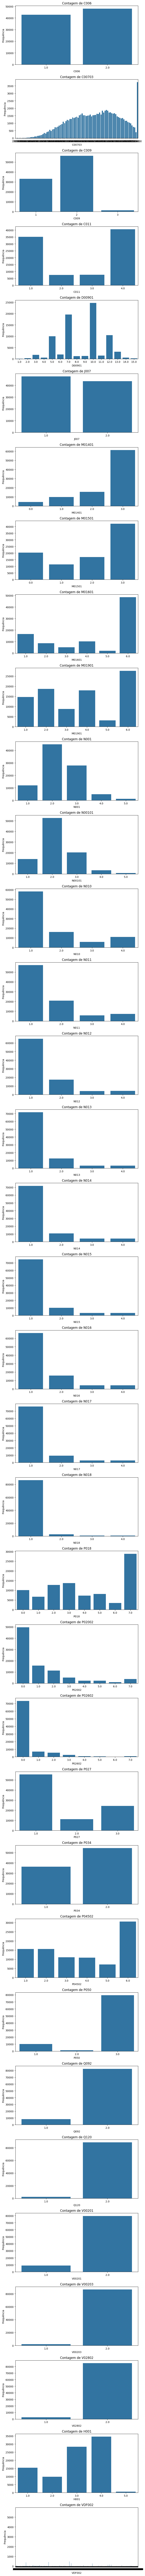

In [35]:
# Definindo o número de colunas
num_cols = len(base.columns)

# Definir o layout para os gráficos
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, num_cols*4))

# Iterar sobre cada coluna categórica e gerar um gráfico de barras
for i, col in enumerate(base.columns):
    sns.countplot(data=base, x=col, ax=axes[i])
    axes[i].set_title(f'Contagem de {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [36]:
col = base.pop('Q092')
base.insert(len(base.columns), 'Q092', col)

In [37]:
base.isnull().sum()

C006          0
C00703        0
C009          0
C011          0
D00901    13965
J007          0
M01401        0
M01501        0
M01601        0
M01901        0
N001          0
N00101        0
N010          0
N011          0
N012          0
N013          0
N014          0
N015          0
N016          0
N017          0
N018          0
P018          0
P02002        0
P02602        0
P027          0
P034          0
P04502        0
P050          0
Q120          0
V00201     2315
V00203     2315
V02802     2987
H001       2315
VDF002     4503
Q092          0
dtype: int64

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [39]:
#cols_label_encode = ['Q092', 'C006', 'C00703', 'D00901', 'M01401','M01501', 'M01601', 'M01901', 
           #'N001', 'N010','N011','N012', 'N013', 'N014', 'N015', 'N016','N017','N018','P027',
           #'P034','P050','V00201','V00203','H001', 'V02802', 'Q120', 'P018', 'P02002', 'P02602', 'P04502'] 

# Não é necessário porque os atributos já são numéricos

cols_label_encode = ['Q092'] # Binarizar a classe para usar no XGBoost
base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)

/tmp/ipykernel_726/3564424618.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)


In [40]:
cols_onehot_encode = ['C009', 'C011']

# Ajustar o OneHotEncoder com base no conjunto de treino
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), cols_onehot_encode)],
    remainder='passthrough'
)

# Aplicar fit_transform no conjunto de treino
base_encoded = transformer.fit_transform(base)

In [41]:
# Obter os nomes das categorias após a codificação
ohe = transformer.named_transformers_['onehot']
onehot_feature_names = ohe.get_feature_names_out(cols_onehot_encode)

# Combinar os nomes das colunas codificadas com as restantes que foram passadas
new_feature_names = list(onehot_feature_names) + list(base.drop(columns=cols_onehot_encode).columns)


In [42]:
new_feature_names

['C009_1',
 'C009_2',
 'C009_3',
 'C011_1.0',
 'C011_2.0',
 'C011_3.0',
 'C011_4.0',
 'C006',
 'C00703',
 'D00901',
 'J007',
 'M01401',
 'M01501',
 'M01601',
 'M01901',
 'N001',
 'N00101',
 'N010',
 'N011',
 'N012',
 'N013',
 'N014',
 'N015',
 'N016',
 'N017',
 'N018',
 'P018',
 'P02002',
 'P02602',
 'P027',
 'P034',
 'P04502',
 'P050',
 'Q120',
 'V00201',
 'V00203',
 'V02802',
 'H001',
 'VDF002',
 'Q092']

In [43]:
X_prev= base_encoded[:, :-1]
y_classe = base_encoded[:, -1]
X_prev

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 2.000e+00,
        2.098e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 3.000e+00,
        1.000e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 4.000e+00,
        4.000e+03],
       ...,
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.000e+00, 3.000e+00,
        1.497e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 2.000e+00,
        6.050e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 4.000e+00,
        1.500e+03]])

In [44]:
# Normalização dos dados

from sklearn.preprocessing import MinMaxScaler

# Inicializar o scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Ajustar e transformar os dados de treinamento
X_prev = scaler.fit_transform(X_prev)


In [45]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

# Imputar os dados ausentes no conjunto de treino
X_prev = imputer.fit_transform(X_prev)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 0)

In [47]:
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import TomekLinks
#from imblearn.combine import SMOTETomek

In [48]:
# Aplicando SMOTETomek (oversampling + undersampling)
#smote_tomek = SMOTETomek(random_state=42)
#X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

#balanceamento_under = TomekLinks(sampling_strategy='auto')
#X_resampled, y_resampled = balanceamento_under.fit_resample(X_train, y_train)

undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

In [49]:
import pickle

In [50]:
with open('dados/depresso.pkl', mode = 'wb') as f:
  pickle.dump([X_resampled, X_test, y_resampled, y_test], f)